In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.register_optimizer as regop
import src.QAA as qaa
from src import qubo
from src import graphs
import src.GRAPH_LDF as qrac
import src.Annealing as ann

In [2]:
G = graphs.square_graph(3)
Q = qubo.QUBO_Q(G)
graph_matrix = qubo.graph_matrix(G)


sol = qubo.QUBO_solver(Q)
classical_cost = qubo.get_cost_colouring(sol, Q)
print(classical_cost)

reg = regop.optimized_register(Q, 5)
#regop.draw_register(reg)

-7.0


[0.782, 0.3988571428571428, 0.10185714285714287, 0.02200000000000002, 0.004142857142857226, 0.007571428571428562, 0.022428571428571464, 0.03142857142857136, 0.04257142857142848, 0.015000000000000124]


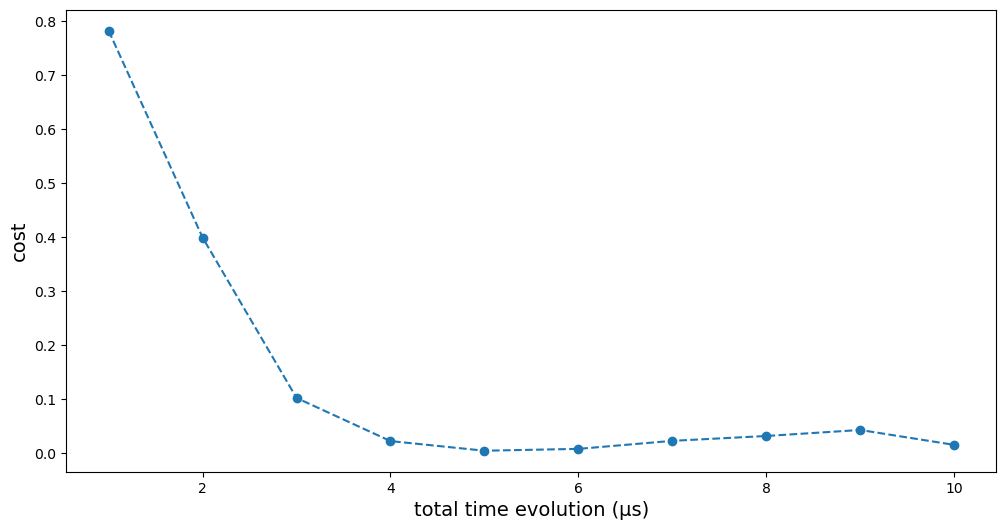

In [3]:
costs = []
for T in np.linspace(1000, 10000, 10):
    seq = qaa.adiabatic_sequence(Q, reg, T)
    counts = qaa.get_counts(seq)
    costs.append(abs(1 - qubo.get_cost(counts, Q)/classical_cost))
print(costs)

qaa.plot_costs(costs)

In [5]:
N_v = len(graph_matrix)
qrac_mat, n_qbit, qbit_ord, features = qrac.QRAC_HAMILTONIAN(graph_matrix, N_v)
_, gs_vector = ann.Annealing_GS(qrac_mat, n_qbit, M=1, taumax=100.0, t_steps=1000)
gs_vector = gs_vector[0]
result, result_1 =  qrac.Graph_partition_func(gs_vector, N_v, qbit_ord, n_qbit, features)
print(result)

[1 1 0 0 1 1 1 1 0]
